## Life Expectancy and GDP Data
The goal of this project was to identify the relationship between the GDP and life expectancy of six countries.

Focusing questions:
- How has life expectancy distribution changed in individual countries over the years?
- What is the relationship between GDP and life expectancy?
- Which country saw the greatest improvement in living conditions (GDP and life expectancy)?

GDP per capita source: [World Bank] (https://www.indexmundi.com/facts/indicators/NY.GDP.PCAP.PP.CD/rankings)

Life expectancy Data Source: [World Health Organization] (http://apps.who.int/gho/data/node.main.688)

### 1. Importing Python modules, loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('all_data.csv')

### 2. Exploring data

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEAB     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [2]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We can see that there are six countries in our data and the timespan ranges from 2000 to 2015.

Life expectancy column was renamed in order to make it easier to use later.

In [3]:
df = df.rename({"Life expectancy at birth (years)":"LEAB"}, axis = "columns")

### 3. GDP and life expectancy distribution.

Average life expectancy is similar for all countries with the exception of Zimbabwe where this value significantly smaller (50 years comparing to mid 70s). 

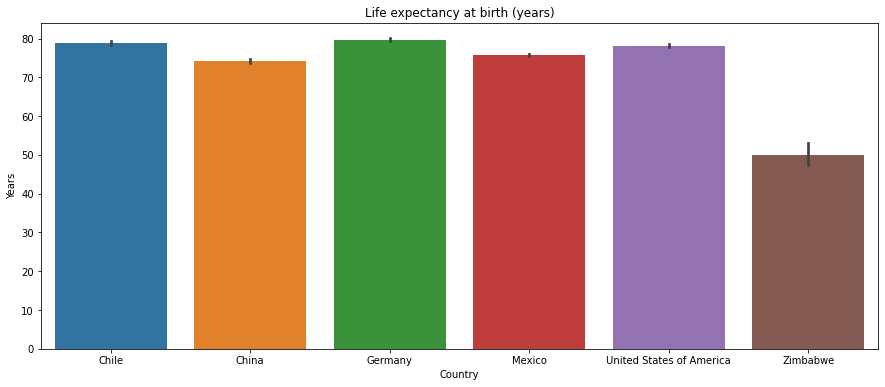

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x="Country", y="LEAB", data=df)
plt.title('Life expectancy at birth (years)')
plt.ylabel("Years");

In terms of average GDP we can see a bigger disproportion. In comparison to the USA, Chile is just barely seen and Zimbabwe is not visible on the chart.

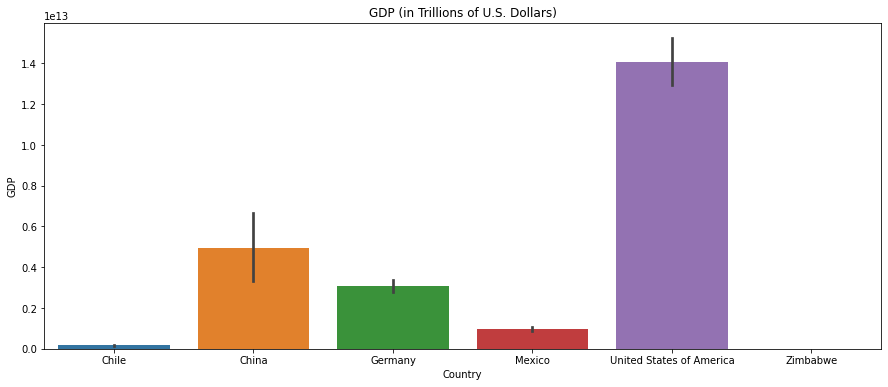

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x="Country", y="GDP", data=df)
plt.title('GDP (in Trillions of U.S. Dollars)')
plt.ylabel("GDP");

### 4. Life expectancy over time

All countries noted increase in life expectancy over the years with Zimbabwe having the greatest one.

Text(0.5, 1.0, 'Life expectancy among different countries')

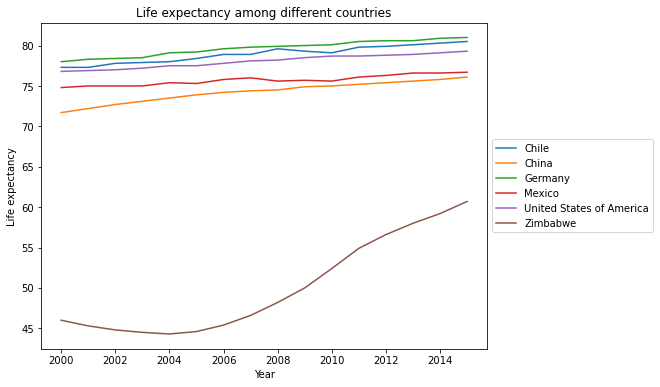

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy");
plt.title('Life expectancy among different countries')

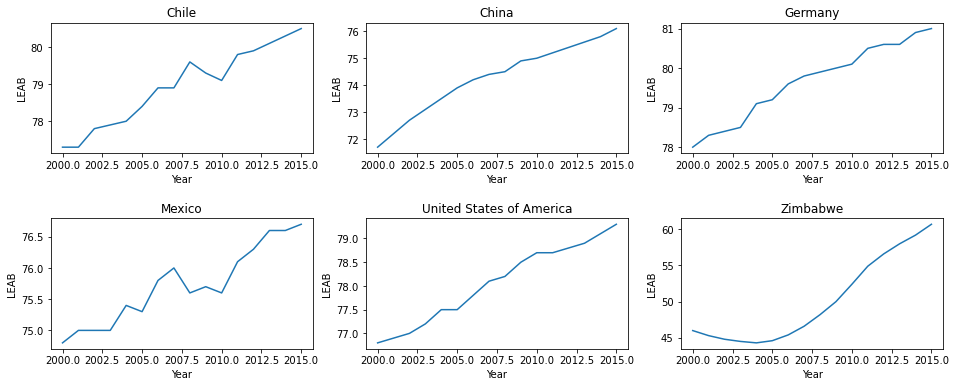

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(16,6))

plt.subplot(2, 3, 1)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Chile'])
plt.title('Chile')

plt.subplot(2, 3, 2)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='China'])
plt.title('China')

plt.subplot(2, 3, 3)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Germany'])
plt.title('Germany')

plt.subplot(2, 3, 4)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Mexico'])
plt.title('Mexico')

plt.subplot(2, 3, 5)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='United States of America'])
plt.title('United States of America')

plt.subplot(2, 3, 6)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Zimbabwe'])
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.5)

### 5. GDP over time

Text(0.5, 1.0, 'GDP among different countries')

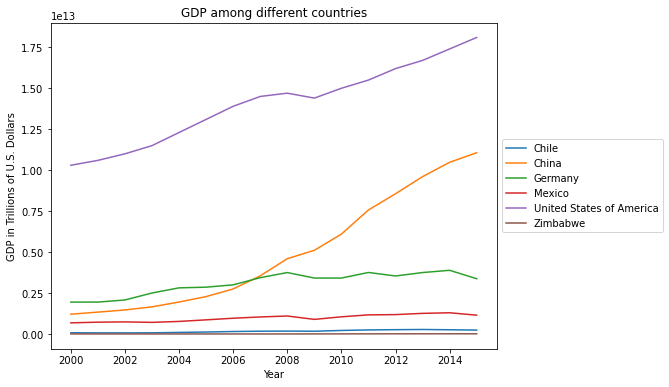

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.title('GDP among different countries')

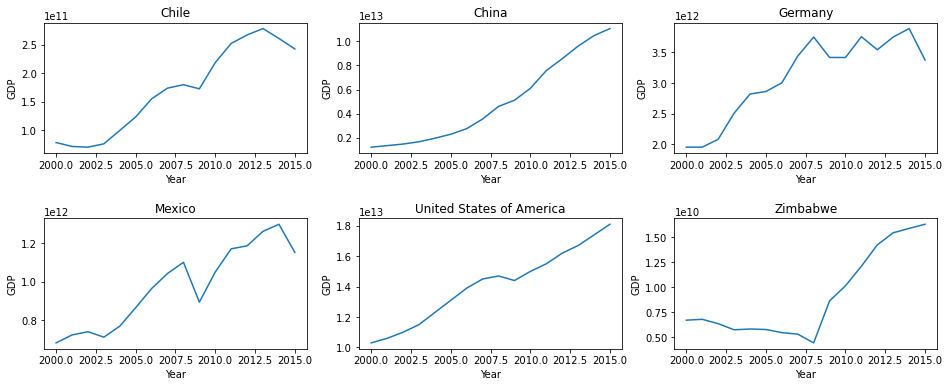

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(16,6))

plt.subplot(2, 3, 1)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Chile'])
plt.title('Chile')

plt.subplot(2, 3, 2)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='China'])
plt.title('China')

plt.subplot(2, 3, 3)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Germany'])
plt.title('Germany')

plt.subplot(2, 3, 4)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Mexico'])
plt.title('Mexico')

plt.subplot(2, 3, 5)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='United States of America'])
plt.title('United States of America')

plt.subplot(2, 3, 6)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Zimbabwe'])
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.5)

### 6. Which country noted the biggest change in life expectancy?
Over the span of 15 years (2000 - 2015) Zimbabwe noted the largest increase in life expectancy at birth.

In [12]:
df_min_max_le = df.drop('GDP', axis=1)
le_min = {}
kraje = []
for country in df_min_max_le.Country:
    if country not in le_min:
        le_min[country] = min(df_min_max_le.LEAB[df_min_max_le.Country == country])
        kraje.append(country)
        
le_max = {}
for country in df_min_max_le.Country:
    if country not in le_max:
        le_max[country] = max(df_min_max_le.LEAB[df_min_max_le.Country == country])
        
data_1 = pd.DataFrame([le_min, le_max])
data_1 = data_1.transpose().reset_index()
data_1.columns = (['Country', 'Min LE', 'Max LE'])
data_1.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data_1['Diff'] = data_1['Max LE'] - data_1['Min LE']
data_1

,Country,Min LE,Max LE,Diff
0,Chile,77.3,80.5,3.2
1,China,71.7,76.1,4.4
2,Germany,78.0,81.0,3.0
3,Mexico,74.8,76.7,1.9
4,United States of America,76.8,79.3,2.5
5,Zimbabwe,44.3,60.7,16.4


<AxesSubplot:xlabel='Country', ylabel='Diff'>

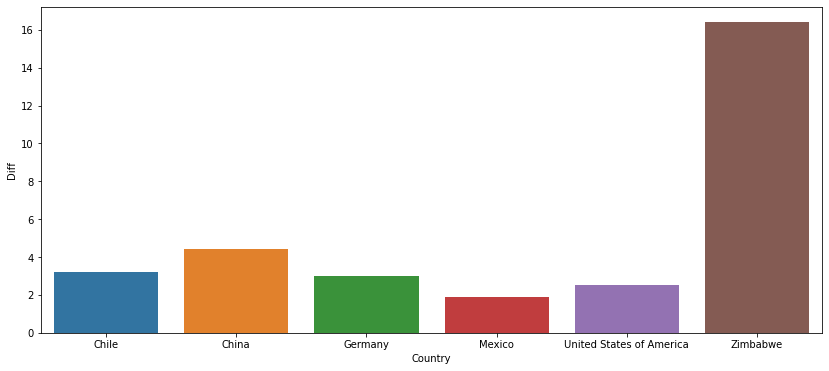

In [18]:
plt.figure(figsize=(14,6))
sns.barplot(x="Country", y="Diff", data=data_1)

### 7. Which country noted the biggest change in GDP?
Over the span of 15 years (2000 - 2015) China and USA noted the largest increase in GDP.

In [16]:
df_min_max_gdp = df.drop('LEAB', axis=1)
gdp_min = {}
for country in df_min_max_gdp.Country:
    if country not in gdp_min:
        gdp_min[country] = min(df_min_max_gdp.GDP[df_min_max_gdp.Country == country])
        
gdp_max = {}
for country in df_min_max_gdp.Country:
    if country not in gdp_max:
        gdp_max[country] = max(df_min_max_gdp.GDP[df_min_max_gdp.Country == country])
        
data_2 = pd.DataFrame([gdp_min, gdp_max])
data_2 = data_2.transpose().reset_index()
data_2.columns = (['Country', 'Min GDP', 'Max GDP'])
data_2['Diff'] = data_2['Max GDP'] - data_2['Min GDP']
data_2

,Country,Min GDP,Max GDP,Diff
0,Chile,6.973681e+10,2.783840e+11,2.086472e+11
1,China,1.211350e+12,1.106470e+13,9.853350e+12
2,Germany,1.949950e+12,3.890610e+12,1.940660e+12
3,Mexico,6.836480e+11,1.298460e+12,6.148120e+11
4,United States of America,1.030000e+13,1.810000e+13,7.800000e+12
5,Zimbabwe,4.415703e+09,1.630467e+10,1.188897e+10


<AxesSubplot:xlabel='Country', ylabel='Diff'>

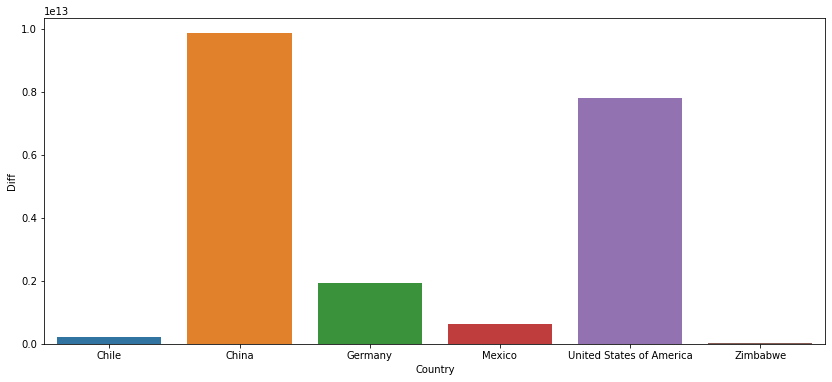

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(x="Country", y="Diff", data=data_2)

### 8. Examining correlaction between GDP and life expetancy
In the scatterplot we can see a positive correlation between these two variables, life expectancy is rising with the GDP.

Text(0.5, 1.0, 'GDP and LEAB correlation')

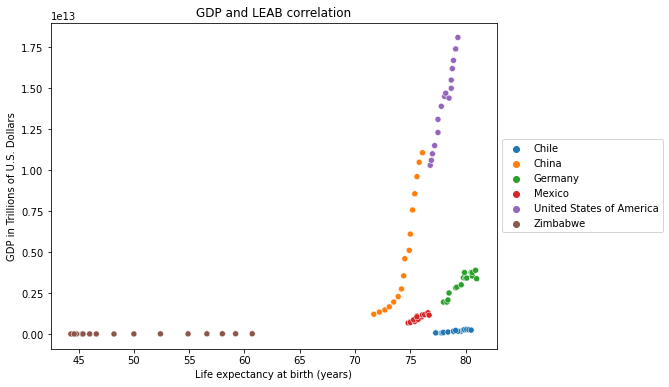

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.LEAB, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.title('GDP and LEAB correlation')

### 9. Conclusions
Coming back to our focusing questions:
- *How has life expectancy distribution changed in individual countries over the years?*<br>
All countries noted increase in life expectancy over the years.<br><br>
 
- *What is the relationship between GDP and life expectancy?*<br>
The relationship is positive with life expectancy rising with GDP values.<br><br>

- *Which country saw the greatest improvement in relation to GDP and life expectancy?* <br>
GDP: China and USA. Life expectancy: Zimbabwe.